# Simulation of standard Snakes and ladders Game
## This program is used to simulate snakes and ladder game to find the average length of the game
** Author: Edwin Ismail **

In [1]:
import random
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# initializing size of the dance
dice = 6


*** snakes and ladders for the game for a snake element [[0]] < element [[1]] and for a ladder element [[0]] < element [[1]] ***

In [2]:
snakes_ladders = [[1, 38], [4, 14], [9, 31], [21, 42], [28, 84], [36, 44], [51, 67], [71, 91], [80, 100], [16, 6], [47, 26], [49, 11], [56, 53], [62, 19],
                  [64, 60], [87, 24], [93, 73], [95, 75], [98, 78]]
#only laddder
#snakes_ladders= [[1, 38], [4, 14], [9, 31], [21, 42], [28, 84], [36, 44], [51, 67], [71, 91], [80, 100]]
#only snakes            
#snakes_ladders=[ [16, 6], [47, 26], [49, 11], [56, 53], [62, 19],[64, 60], [87, 24], [93, 73], [95, 75], [98, 78]]

*** random snake and ladder generator ***


In [3]:
def RandomSnake(numSnake, numLadder):
    randomSnake = []
    countSnake = 0
    countLadder = 0
    s_l_set = set()
    s_l_set.update([])
    while len(randomSnake) < (numSnake+numLadder) :
        x = random.randint(1, 100)
        y = random.randint(1, 100)
        if y > x and countSnake < (numSnake) and y != 100:
            if not y in s_l_set and  not x in s_l_set:
                randomSnake.append([y, x])
                countSnake += 1
        if y < x and countLadder < (numLadder):
            if not y in s_l_set and not x in s_l_set:
                randomSnake.append([y, x])
                countLadder += 1
        for ele in randomSnake:
            s_l_set.update(ele)
    # just verifying if snakes and ladders are unique
    """df=pd.DataFrame(list(s_l_set),columns=['just'])
    print(df['just'].value_counts())"""
    return randomSnake

*** Function for the simulation of the game snakes and ladders ***


In [4]:
def gamesimulation(sl, dice):
    # initialization of parameters count for counting the length of game, path records the step of the game to  completion, token is actual element moving through the game
    count = 0
    path = []
    token = 0
    while token < 100:
        roll = random.randint(1, dice)
        token = token+roll
        count += 1
        if token > 100:
            token = token-roll
        for trans in sl:
            if token == trans[0]:
                token = trans[1]
                break
        path.append(token)
    return [count, path]

*** Function for commanding how many times the game should be played ***


In [5]:
def NumberOfGame(number,snakes):
    countlist = []
    for num in range(0, number):
        countlist.append(gamesimulation(snakes, dice))
    return countlist

*** Function is to presenting the result of the game ***

In [6]:
def results(countlist):
    print("The minimum lenght of the game is {} \n the shortest path is {}".format(
        (min(countlist))[0], (min(countlist))[1]))
    print("The maximum lenght of the game is {} \n the longest path is {}".format(
        (max(countlist))[0], (max(countlist))[1]))
    sums = 0
    for ele in countlist:
        sums += ele[0]
    print("Average length of the game is {}".format(sums/len(countlist)))
    return countlist

In [7]:
#playing 100000 games
countlist=results(NumberOfGame(100000,snakes_ladders))

The minimum lenght of the game is 7 
 the shortest path is [14, 17, 23, 84, 90, 94, 100]
The maximum lenght of the game is 302 
 the longest path is [38, 43, 44, 48, 67, 68, 72, 77, 81, 24, 29, 33, 34, 44, 46, 26, 31, 32, 33, 44, 50, 53, 54, 58, 59, 60, 60, 19, 42, 45, 46, 50, 55, 58, 60, 60, 63, 68, 69, 73, 76, 77, 81, 24, 26, 29, 33, 34, 44, 26, 32, 38, 44, 50, 54, 53, 58, 59, 63, 68, 72, 74, 77, 82, 84, 88, 73, 76, 82, 83, 24, 29, 30, 44, 48, 54, 53, 53, 59, 60, 66, 91, 92, 96, 96, 78, 81, 24, 26, 84, 88, 89, 90, 73, 78, 79, 83, 24, 29, 34, 38, 42, 43, 26, 27, 30, 35, 37, 39, 41, 46, 11, 14, 15, 17, 42, 26, 31, 35, 40, 44, 26, 30, 34, 38, 39, 42, 45, 26, 27, 29, 33, 39, 43, 46, 52, 55, 59, 19, 24, 29, 30, 32, 34, 38, 40, 43, 11, 14, 6, 8, 11, 17, 20, 22, 23, 25, 30, 35, 41, 26, 32, 44, 45, 67, 72, 78, 82, 24, 29, 33, 35, 41, 45, 46, 11, 14, 17, 19, 42, 45, 50, 53, 59, 19, 22, 23, 26, 31, 44, 26, 31, 35, 39, 42, 46, 11, 13, 19, 24, 25, 31, 37, 41, 43, 45, 48, 50, 53, 57, 59, 65, 69, 

*** converting a list to numpy array for ease graph plotting ***

In [8]:
countList=np.array(countlist)

In [9]:
#reshaping array to the shape (100000,)
countList=countList[:,:-1].reshape(100000,)

(0, 302)

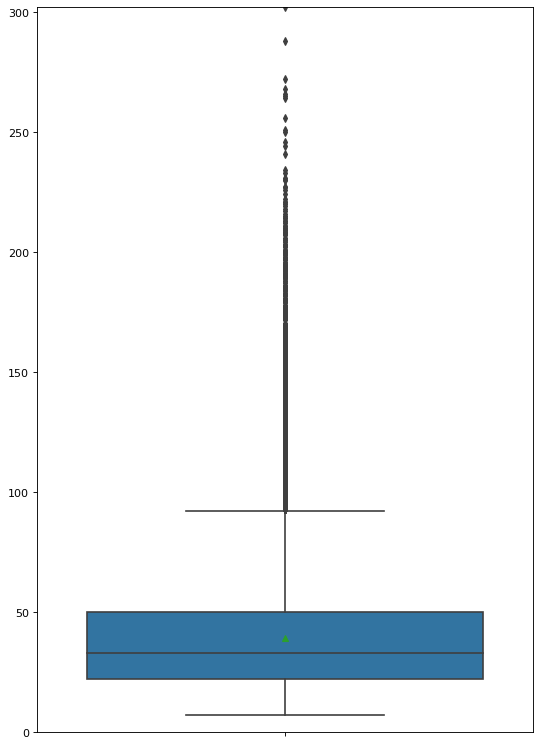

In [10]:
#plotbox 
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(countList,orient="v",showmeans=True)
plt.ylim(0,(max(countlist))[0])

Text(0.5, 1.0, 'Simulated Lengths of Chutes & Ladders Games')

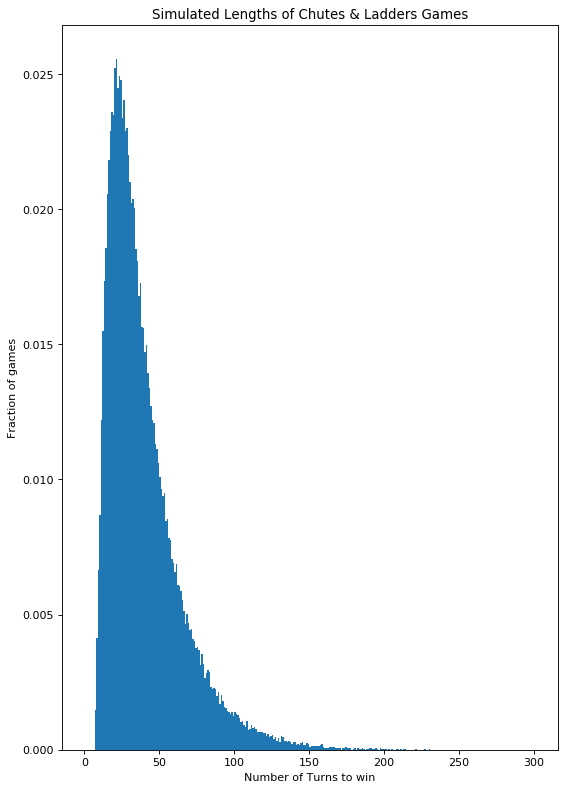

In [11]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range((max(countlist))[0]),density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Chutes & Ladders Games')

In [12]:
df=pd.DataFrame(data=countList,columns=["number of turns"])
df["number of turns"].value_counts()

21     2553
20     2520
23     2492
24     2476
22     2446
       ... 
219       1
220       1
288       1
222       1
302       1
Name: number of turns, Length: 235, dtype: int64

In [13]:
result=[]
for i in range(0,100000):
    result.append(RandomSnake(10,9))

In [14]:
result=np.array(result)
result=result.reshape(3800000)
result


array([71, 57, 36, ...,  5, 53, 49])

*** shows distribution of random snake and ladder

Text(0.5, 1.0, 'distribution of the random snake and ladders')

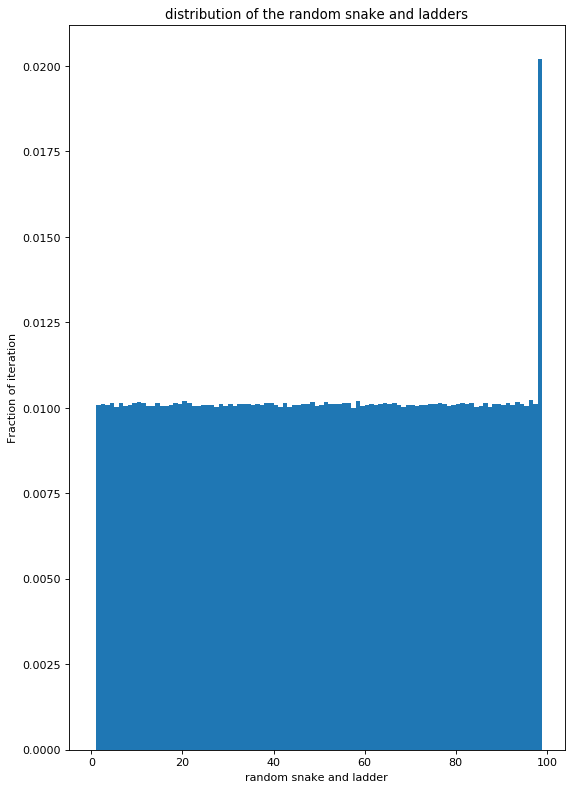

In [15]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(result,bins=range((max(result))),density=True)
plt.xlabel('random snake and ladder')
plt.ylabel('Fraction of iteration')
plt.title('distribution of the random snake and ladders')

In [16]:
countlist = results(NumberOfGame(100000,RandomSnake(10,9)))

The minimum lenght of the game is 5 
 the shortest path is [2, 86, 88, 94, 100]
The maximum lenght of the game is 426 
 the longest path is [5, 11, 17, 23, 7, 86, 88, 74, 76, 79, 84, 4, 6, 86, 74, 79, 81, 13, 14, 55, 61, 54, 60, 64, 70, 72, 73, 75, 77, 80, 84, 85, 4, 6, 9, 14, 15, 20, 24, 7, 28, 37, 39, 44, 56, 62, 65, 68, 74, 76, 80, 70, 76, 70, 76, 77, 13, 14, 18, 23, 7, 9, 28, 34, 40, 46, 52, 54, 59, 61, 63, 69, 74, 78, 70, 72, 74, 76, 81, 4, 5, 9, 28, 32, 37, 40, 44, 56, 57, 62, 68, 73, 79, 13, 55, 56, 61, 65, 71, 75, 81, 4, 5, 7, 13, 15, 18, 22, 26, 7, 13, 17, 18, 55, 60, 54, 56, 57, 60, 54, 53, 55, 57, 59, 64, 68, 74, 76, 80, 85, 88, 74, 78, 84, 74, 75, 76, 70, 73, 79, 80, 85, 50, 54, 57, 53, 53, 53, 57, 63, 54, 55, 53, 53, 59, 62, 64, 68, 73, 75, 76, 81, 85, 50, 56, 53, 56, 57, 59, 60, 65, 68, 70, 74, 80, 70, 73, 78, 84, 88, 50, 54, 55, 57, 63, 54, 53, 54, 53, 53, 53, 55, 56, 53, 59, 65, 68, 70, 72, 75, 81, 86, 50, 52, 53, 56, 62, 54, 53, 59, 61, 63, 64, 65, 71, 76, 79, 81, 4, 7

In [17]:
countList=np.array(countlist)
countList=countList[:,:-1].reshape(100000,)

*** plot box ***

(0, 426)

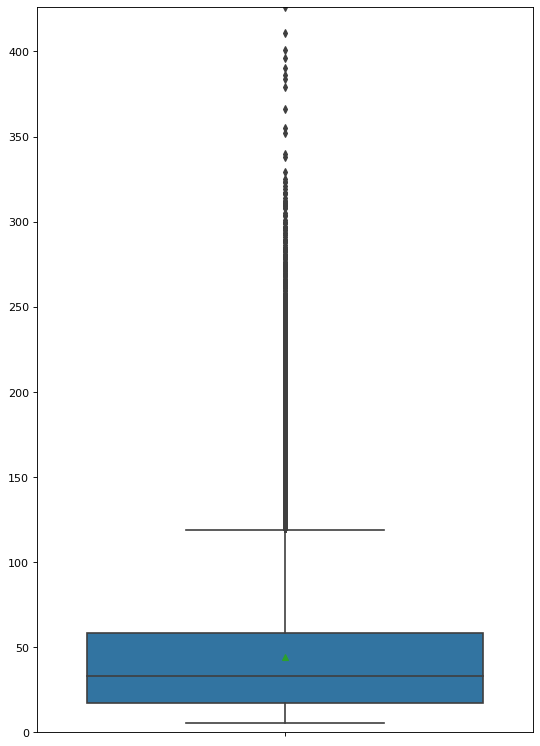

In [18]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(countList,orient="v",showmeans=True)
plt.ylim(0,(max(countlist))[0])

*** distribution of length of the game against franction of the game ***

Text(0.5, 1.0, 'Simulated Lengths of Chutes & Ladders Games')

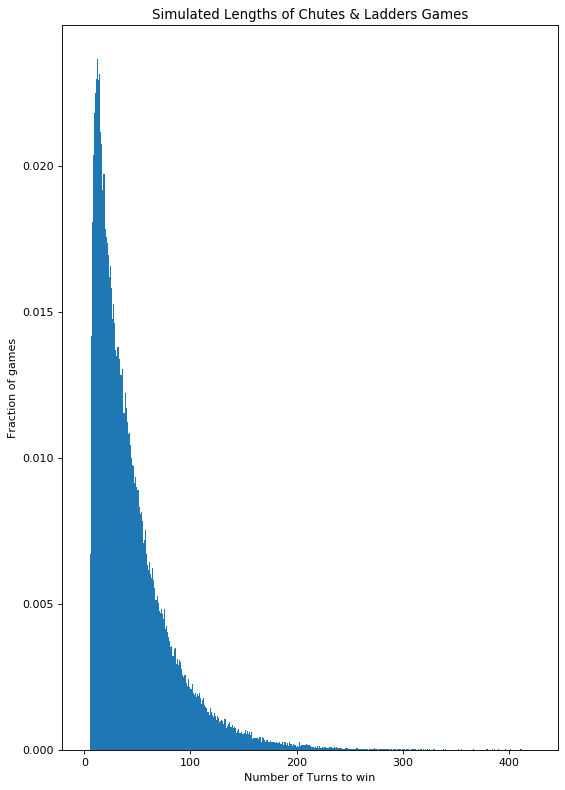

In [19]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range((max(countlist))[0]),density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Chutes & Ladders Games')